# Synthetic Portfolio (Matching)  for financial event studies: an example
## 1. Merger Announcements (high beta)
On February 1, 2008, Microsoft unveiled a hostile offer for Yahoo Inc (YHOO) of $44.6$ billion. Microsoft Corp’s (MSFT) offer of $31$ dollars per Yahoo share consisted of one-half cash and one-half Microsoft shares, and represented a $62\%$ premium to Yahoo’s closing price on the previous day. However, Yahoo’s board of directors – led by co-founder Jerry Yang – rejected Microsoft’s offer, saying that it substantially undervalued the company. Unfortunately, the credit crisis that gripped the world later that year also took its toll on Yahoo shares, resulting in the stock trading below $10$ by November 2008. Yahoo’s subsequent road to recovery was a long one, and the stock only exceeded Microsoft’s original $31$ offer five and a half years later in September 2013.

Read more: How Mergers and Acquisitions Can Affect A Company | Investopedia http://www.investopedia.com/articles/investing/102914/how-mergers-and-acquisitions-can-affect-company.asp#ixzz4sZ1VgjjF 

## 2. Motivation for synthetic portfolio
The synthetic control method (Abadie, Diamond and Hainmuller, 2010),  has received a lot of attention in comparative case studies on different subjects: terrorism, natural disasters, tabacco control programs. As opposed to competing methods, synthetic control method's strength relies in the use of a combination of units to built a more objective comparison for the unit exposed to the intervention, rather than a choosing a single unit or a "Ad hoc" reference group. The authors advocate for the use of data drive procedures to build the reference group. The synthetic control method is a weighted average of the available control units, that makes explicit: the contribution of each unit to the counterfactual of interest and the similarities (or lack thereof) between the unit affected by the event or the intervention of interest and the synthetic control in terms of the pre-intervention outcomes and other predictors of post-intervention outcomes.

Synthetic matching techniques applied for event studies in finance are not common, we are only aware of their application in a recent paper, Acemoglu, Johnson, Kermani and Kwak (2016). In this paper the authors measure the effect of personal connections on the returns of financial firms. The study is based on the connections of Timothy Geithner to different financial institutions prior to his nomination as Treasury Secretary at the end of 2008. The synthetic matching methodology is used as a complement to the usual approach in event studies of capturing the difference between a treatment and control group using for the latter the mean return model or the fitted market model. 

We provide an example of the synthetic matching technique, which we denote as synthetic portfolio method (as special case of synthetic control methods) that has important potential in financial event studies.

The first paper where we explore the methodology provides an aplication with intraday data and evaluates the effectiveness of volatility auctions, a type of trading halt mechanism found in many stock markets (it has some similarity to limit-up/limit-down). The working paper version can be found: http://repository.urosario.edu.co/bitstream/handle/10336/13211/dt195.pdf?sequence=3

## 3. Read data and obtain data for estimation window. 

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [4]:
# Read event dates
evdate='2008-02-01'
filepath="DatesE10107_10.csv"
edate=pd.read_csv(filepath,sep=",",parse_dates=[1],index_col=[0],header=None, names=["event","date"])
edate.head()
#print("Event day:", evdate)

,date
event,
BeginEstwdow,2007-07-31
EndEstwdow,2007-12-28
BeginEvtwdow,2008-01-22
EndEvtwdow,2008-02-15


In [5]:
# Load data
with open('E10107_10.pickle', 'rb') as file:
    fdata = pickle.load(file)
fdata.head()

PERMNO,10107,sprtrn,10001,10002,10025,10026,10028,10032,10042,10044,...,92284,92340,92399,92583,92655,92663,92690,92807,92874,93105
date,,,,,,,,,,,,,,,,,,,,,
2007-07-31,-0.013946,-0.012647,-0.002819,-0.007946,0.016410,-0.003759,0.000000,-0.016626,0.000000,-0.020454,...,-0.023691,-0.012090,-0.007937,0.012115,-0.010421,-0.031627,0.017699,0.064972,-0.013767,-0.079167
2007-08-01,0.010693,0.007243,0.003534,-0.003432,-0.016398,-0.002322,-0.007500,-0.010309,-0.020370,0.013603,...,0.045977,-0.019860,0.002667,-0.007481,-0.009085,-0.061758,-0.015942,0.015915,0.000000,-0.063348
2007-08-02,0.007509,0.004359,0.000000,0.001722,-0.016158,0.002910,-0.017607,0.017917,-0.017013,0.019264,...,0.045991,0.005993,-0.010638,0.026633,0.007710,0.014557,-0.013844,0.018277,-0.006764,-0.004831
2007-08-03,-0.018967,-0.026586,-0.019014,-0.052149,-0.047706,-0.006382,0.025615,-0.083504,-0.038462,0.015464,...,-0.042802,-0.003546,-0.002688,-0.063142,-0.017783,-0.044916,-0.028524,-0.064103,-0.008011,-0.053398
2007-08-06,0.020024,0.024151,-0.012922,0.003628,-0.008760,0.021606,-0.002500,-0.016079,-0.020000,-0.043204,...,0.007317,0.051601,-0.142857,-0.049112,0.021053,0.011757,-0.016141,-0.035616,-0.012107,0.056410


## 4. Estimate Market model and perfomence, before event window (MSE)

Event studies is one of the most widely used methodologies in accounting and financial research (Kothari and Warner, 2005), and in certain legal proceedings. The timeline structure of an event study has not changed dramatically since its introduction in the late sixties (Ball and Browm, 1968; Fama et al, 1969). There are important number of contributions that have focused specially on providing better tools for statistical inference, see Corrado (2011) for a recent discussion. A recurrent element in event studies is the use of the market model to estimate the so call “normal” returns. 
In traditional event studies the most common approach to define the normal retunrs, is to use a market model or another factor model (Fama-French three factor or Carhart four factor model). This is actually very close to the original idea of a synthetic control, where the data generating process of $R_{i,t}^{N}$ is determined by a factor model. In finance, factor models are used in many application, and although there is an extensive literature, there is also an important discussion on the validity of the factors used to explain the cross section of returns (Harvey, Liu and Zhu, 2015). Event studies consider mainly the one factor market model.
\begin{equation}
AR_{1,t}=R_{1,t}-\hat{\alpha}_{i}-\hat{\beta}_{i}R_{m,t},
\end{equation}
where $R_{m,t}$ denotes the market return.

In [6]:
# Prepare data
# Estimation Window
estwdow=fdata.loc[:edate.loc['EndEstwdow'][0],:]
#GAP and Event window
gpevtwdow=fdata.loc[edate.loc['EndEstwdow'][0]:,:]
mkt_X_train=estwdow.loc[:,'sprtrn']
mkt_X_train=mkt_X_train.values.reshape(-1,1)
mkt_y_train=estwdow.loc[:,10107]
mkt_X_test=gpevtwdow.loc[:,'sprtrn']
mkt_X_test=mkt_X_test.values.reshape(-1,1)
mkt_y_test=gpevtwdow.loc[:,10107]
#type(mkt_X_train)

In [7]:
# OLS with sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()

In [8]:
reg.fit(mkt_X_train,mkt_y_train)
mkt_beta=reg.coef_
print('Market beta:',mkt_beta)
#insample
mkt_y_pred_is=reg.predict(mkt_X_train)
mkt_mse_train=mean_squared_error(mkt_y_train, mkt_y_pred_is)
#out-of-sample
mkt_y_pred_os=reg.predict(mkt_X_test) #Potential outcome mkt model
mkt_mse_test=mean_squared_error(mkt_y_test, mkt_y_pred_os)
print('MSE in-sample:', mkt_mse_train)
print('MSE out-of-sample:', mkt_mse_test)

Market beta: [ 0.873992]
MSE in-sample: 0.000175931374556
MSE out-of-sample: 0.000368474742815


## 5. Estimate Synthetic portfolio with LASSO

For the event study, we perform on the volatility auctions we follow a different approach that deviates from the use of the market model or the constant mean model to build the expected normal return. The main reason to deviate from the traditional approach is that we consider the expected return as a potential outcome. Taking that point of view, we try adapting existing methods in causal inference, in particular synthetic control methods (introduced by Abadie, Diamond and Hainmuller, 2010) to the problem at hand.
$R_{1,t}$ is the return of the security of interest where we want to measure the effect of the event (the stock that has been treated). In this example, the stock of Microsoft (the adquirer) involved in the announcement. Conversely, the synthetic portfolio is built using the other securities (that are not envolved in a similar event and that are trading during the same days) to replicate the performance of the security of interest.
The methodology is very simple since we only need to estimate $w_{j}^{*}$ required to estimate the effect of the intervention by solving the optimal tracking problem. Therefore we have to solve,
\begin{equation}
\mathbf{w}^{*} = argmin_{\mathbf{w}} \sum_{t=1}^{T_{0}} \left( R_{1,t}-\sum_{j=2}^{J}w_{j}R_{j,t}  \right)^{2}
\end{equation}
for the pre-intervention or estimation window $t \in [1,T_{0})$. It is possible to include in this optimization problem restrictions on the estimated weights, for example non-negativity constraints. 
A proper tracking of the security of interest would guarantee that the synthetic portfolio can provide a potential outcome for the latent variable $R_{1,t}^{N}$, in the post event window $(T_{0},T]$. The goodness of fit of the matching can be established by estimating the Mean Square Error in the estimation window or by testing the cumulative abnormal returns.\\
The effect of the intervention is equivalent to the abnormal returns of the asset of interest,
\begin{equation}
  \hat{\alpha}_{1,t}=AR_{1,t}= R_{1,t}-R_{1,t}^{N} 
  					          =R_{1,t}-\sum_{j=2}^{J}w_{j}^{*}R_{j,t}, t \in (T_{0},T]
\end{equation}

### Optimal portfolio optimization as a least square problem.
Traditional optimal portfolio problems are formulated explicitly using the trade-off between return and risk, that is the mean variance problem (Markowitz, 1952). 
\begin{equation}
\mathbf{w}^{*} = argmin_{\mathbf{w}} \frac{1}{2}V_{t}[R_{p,t+1}]=w'\Sigma w, \text{s.t.}  E_{t}[R_{p,t+1}]=w'\mu=\mu_{p}
\end{equation}
where $\mu_{p}$ is the target expected portfolio return and $\Sigma$ is the variance covariance matrix of the universe of expected returns, $\mu$. The optimization problem has a tracktable analytical solution
\begin{equation}
\mathbf{w}^{*} = \frac{\mu_p}{\mu'\Sigma^{-1}\mu}\Sigma^{-1}\mu
\end{equation}
Well documented ill-posed problems arrise when we plug-in the sample counterparts of $\mu$ and $\Sigma$, for medium to large size problems in terms of the number of assets considered. Many regularization techniques have been proposed to deal with this problem (Frost and Sabarino, 1986; Ledoit and Wolf, 2004; Tu and Zhou, 2009; Brodie et al., 2009). The use of regularization techniques also point to different way to writtin up the optimization problem that will be specially usefull to the synthetic porfolio framework (Carrasco and Noumon, 2010). We can write the variance covariance matriz as the outer product of the returns, second and square of the first moment, $\Sigma=E[R_{t}R_{t}']-\mu\mu'$. Then the mean variance problem (an the empirical counterpart, square of $l_{2}$ norm) can be re-written as,
\begin{equation}
\mathbf{w}^{*} = argmin_{\mathbf{w}} E[|\mu_{p}-w'R|^{2}], \text{s.t.}  E_{t}[R_{p,t+1}]=w'\mu=\mu_{p}
\end{equation}
\begin{equation}
\mathbf{w}^{*} = argmin_{\mathbf{w}} \frac{1}{T}||\mu_{p}\mathbf{1}_{T}-w'R||_{2}^{2} \text{s.t.}  E_{t}[R_{p,t+1}]=w'\mu=\mu_{p}
\end{equation}
This same setup can be used to find a solution for the optimal tracking problem as a special case of the optimal portfolio problem where instead of targeting a particular return (scalar) for the porfolio $\mu_{p}$ we are interested in trackin over time a particular stock, in our case the first stock in the asset space, $R_{1,t}$. Let $\mu_{p}\mathbf{1}_{T}:=R_{1,t}$ and $R:=[R_{2,t},\ldots,R_{J,t}]$ denote the subspace of assets that excludes asset $1$, then we get the optimal tracking problem that returns the synthetic porfolio,
\begin{equation}
\mathbf{w}^{*} = argmin_{\mathbf{w}} \sum_{t=1}^{T_{0}} \left( R_{1,t}-\sum_{j=2}^{J}w_{j}R_{j,t}  \right)^{2}
\end{equation}
This optimization problem is not very different form minimuzing the sums of square residuals (conic programming, Schmelzer et al., 2013) if we let, $Y:=R_{1,t}$ and $X'\beta:=\mathbf{R}_{\forall j\neq1}'w$, then we can use ordinary least squares (OLS) to obtain the portfolio weights. However, in the example we have a large asset space ($J>5000$) for the group of assets that make up the control group. Therefore we have to use a way to shrink the asset space in an optima way. 

The Least absolute shrinkarge and selection operator (LASSO) regularization (we need a regularizationn solution beacuse we have an overdetermined system, more parameters than observations) technique introduced by Tibshirani (1996) is the $l_{1}$-penalized version of the optimal tracking problem that gives the solution to the synthetic porfolio. The Lasso regularized solution is obtained by solving,
\begin{equation}
\mathbf{w}^{*} = argmin_{\mathbf{w}} \sum_{t=1}^{T_{0}} \left( R_{1,t}-\sum_{j=2}^{J}w_{j}R_{j,t}  \right)^{2} +\tau \sum_{j=2}^{J}|w_{j}|
\end{equation}
The optimization problem for LASSO includes the restriction on the sum of the weights (all wealth is invested) $\sum_{j=2}^{J}w_{j}=1$ and in addition it is possible to impose long-only portfolios $w_{i}\geq0$ or impose an specific penalty ($\tau$) only in the short postitions (Brodie et al. 2009).

In [9]:
# Prepare data for LASSO
#sample all data and then split
X_data=fdata.iloc[:,2:]
#train
syn_X_train_l=X_data.loc[:edate.loc['EndEstwdow'][0],:]
#test
syn_X_test_l=X_data.loc[edate.loc['EndEstwdow'][0]:,:]
# use mkt_y_test=gpevtwdow.loc[:,10107]
syn_X_train_l.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2007-07-31 to 2007-12-28
Columns: 6219 entries, 10001 to 93105
dtypes: float64(6219)
memory usage: 5.0 MB


In [10]:
# LASSO
#alpha is the tunnig parameter, larger impose a greater penalty,
#OLS no penalty (alpha=0), criteria to find optimal alpha, need loss function???
slreg = linear_model.Lasso(alpha=0.0001,fit_intercept=False, max_iter=1000,positive=True)
slreg.fit(syn_X_train_l,mkt_y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=True, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
# Portfolio weights
lsw=slreg.coef_
stockid=syn_X_train_l.columns[np.nonzero(lsw)]
lweights=lsw[np.nonzero(lsw)]
lweights=lweights/lweights.sum() #re-weight
lweights=dict(zip(stockid,lweights))
lweights=pd.Series(lweights, index=stockid)
lwa=np.array(lweights.values)[:,None] # wa.shape: (41,1) vector

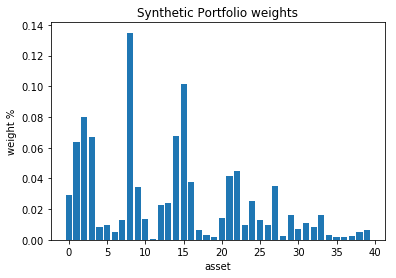

In [12]:
#Plot the weights with bar plot
plt.bar(range(lweights.shape[0]), lweights.values)
plt.xlabel('asset')
plt.ylabel('weight %')
plt.title('Synthetic Portfolio weights')
#plt.xticks(lweights.index.tolist())
plt.show()

In [13]:
# Select asset with non-zero weights
X_data_ls=X_data.loc[:,stockid]
#train
syn_X_train_ls=X_data_ls.loc[:edate.loc['EndEstwdow'][0],:]
#test
syn_X_test_ls=X_data_ls.loc[edate.loc['EndEstwdow'][0]:,:]
#in-sample
lXX=np.matrix(syn_X_train_ls.values)  # XX.shape: (103,41) matrix
lsyn_y_pred_is=lXX*lwa  # syn_y_pred_is.shape: (103,1) vector
lsyn_mse_train=mean_squared_error(mkt_y_train, lsyn_y_pred_is)
#out-of-sample
lXX_test=np.matrix(syn_X_test_ls.values)  # XX.shape: (19,41) matrix
lsyn_y_pred_os=lXX_test*lwa #Potential outcome mkt model
lsyn_mse_test=mean_squared_error(mkt_y_test, lsyn_y_pred_os)
print('MSE in-sample:', lsyn_mse_train)
print('MSE out-of-sample:', lsyn_mse_test)

MSE in-sample: 0.000134782505911
MSE out-of-sample: 0.00048723904166


## 6. Estimate Abnormal returns, Visualize estimation and event window.

In [14]:
# estimation window (train) and gap-event window (test)
# observed, mkt_f, syn_s, syn_l
obs=fdata.iloc[:,0]
mkt_y_pred=np.append(mkt_y_pred_is[:len(mkt_y_pred_is)-1],mkt_y_pred_os)
lsyn_y_pred=np.append(list(lsyn_y_pred_is[:len(syn_X_train_l)-1,:].flat),list(lsyn_y_pred_os.flat))
#make a pd data frame for seaborn # there might be a problem here with business days that makes
#additional days
ret=pd.DataFrame({'observed':obs.values,'mkt_model':mkt_y_pred,'synthetic_lasso':lsyn_y_pred},index=obs.index)

In [15]:
import seaborn as sns
sns.set_style("white")
#sns.despine()

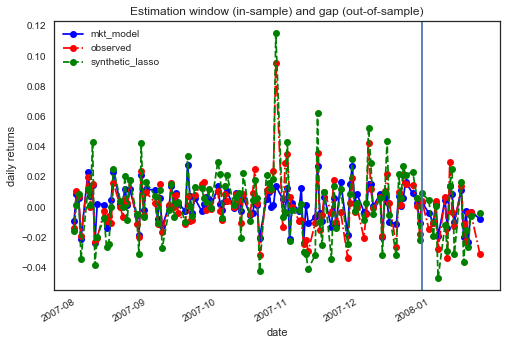

MSE in-sample mk model: 0.000175931374556
MSE in-sample synth lasso: 0.000134782505911


In [16]:
#Line graph of observed, mkt model fitted and synthetic returnsimport
ret_swdow=ret.loc[:edate.loc['BeginEvtwdow'][0],:]
#dfp=ret
dfp=ret_swdow
f, ax = plt.subplots(1, 1)
#x_col='date'
#y_col='daily returns'
ax.plot_date(dfp.index, dfp["mkt_model"], color="blue", label=ret['mkt_model'].name, linestyle="-")
ax.plot_date(dfp.index, dfp["observed"], color="red", label=ret['observed'].name, linestyle="-.")
ax.plot_date(dfp.index, dfp["synthetic_lasso"], color="green", label=ret['synthetic_lasso'].name, linestyle="--")
ax.legend(loc='upper left')
ax.axvline(x=edate.loc['EndEstwdow'][0])
plt.xlabel('date')
plt.ylabel('daily returns')
plt.title('Estimation window (in-sample) and gap (out-of-sample)')
plt.gcf().autofmt_xdate()
plt.show()
print('MSE in-sample mk model:', mkt_mse_train)
print('MSE in-sample synth lasso:', lsyn_mse_train)

In [17]:
# bar graph of Abnormal retunrs
ret_ewdow=ret.loc[edate.loc['BeginEvtwdow'][0]:,:]
ar_mkt=ret_ewdow.loc[:,'observed']-ret_ewdow.loc[:,'mkt_model']
ar_lsyn=ret_ewdow.loc[:,'observed']-ret_ewdow.loc[:,'synthetic_lasso']
ar=pd.DataFrame({'mkt_model':ar_mkt,'synthetic_lasso':ar_lsyn},index=ret_ewdow.index)

In [18]:
ar

,mkt_model,synthetic_lasso
date,,
2008-01-22,-0.023270,-0.026796
2008-01-23,-0.022675,-0.019889
2008-01-24,0.030487,0.048153
2008-01-25,0.002491,0.003261
2008-01-28,-0.024081,0.001425
2008-01-29,-0.011103,0.001467
2008-01-30,-0.010165,0.003410
2008-01-31,-0.004295,-0.000956
2008-02-01,-0.078711,-0.085267


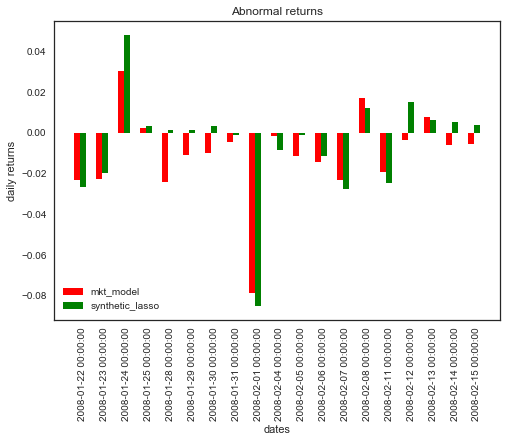

Event day: 2008-02-01


In [19]:
from matplotlib import dates
N = ar.shape[0]
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars
fig = plt.figure()
arp = fig.add_subplot(111)
rects1 = arp.bar(ind, ar['mkt_model'], width, color='r')
rects2 = arp.bar(ind+width, ar['synthetic_lasso'], width, color='g')
#arp.axvline(x= pd.to_datetime(evdate))
arp.set_title('Abnormal returns')
arp.set_ylabel('daily returns')
arp.set_xlabel('dates')
arp.set_xticks(ind+width)
arp.set_xticklabels(ar.index)
arp.legend( (rects1[0], rects2[0]), (ar['mkt_model'].name, ar['synthetic_lasso'].name), loc='lower left')
#formatter = DateFormatter('%Y-%m-%d')
#arp.xaxis.set_major_formatter(formatter)
#plt.gcf().autofmt_xdate()
plt.xticks(rotation=90)
plt.show()
#fix dates and single out event
print("Event day:", evdate)

## 7. Perform Testing